In [1]:
import numpy as np
from tqdm.notebook import tqdm as tqdm_notebook
from scipy import stats
import matplotlib.pyplot as plt


In [2]:
def GenerateXY(prop_X, prop_Y, delta, n):
        U_x = stats.norm(loc=prop_X[0], scale=1).rvs(size=n)
        V_x = stats.norm(loc=prop_X[0], scale=prop_X[1]).rvs(size=n)
        W_x = stats.uniform().rvs(size=n)
        X = np.where(W_x > delta, U_x, V_x)

        U_y = stats.norm(loc=prop_Y[0], scale=1).rvs(size=n)
        V_y = stats.norm(loc=prop_Y[0], scale=prop_Y[1]).rvs(size=n)
        W_y = stats.uniform().rvs(size=n)
        Y = np.where(W_y > delta, U_y, V_y)
        return X, Y

# Критерий Стьюдента VS Манна-Уитни

## Влияние разброса на критерии

In [3]:
np.random.seed(24)
negatives_ttest, negatives_mw = 0, 0
alpha, conf_int_alpha = 0.05, 0.05
mu_x, mu_y = 1, 1.5
delta = 0.1
sigma_list = np.arange(1, 10, 1)
n, n_tests = 20, 1000 
p_values_ttest, p_values_mw, fnr_ttest, fnr_mw = [], [], [], []


for sigma in tqdm_notebook(sigma_list):
    for i in tqdm_notebook(range(n_tests)):  
        
        X, Y = GenerateXY([mu_x, sigma], [mu_y, sigma], delta=delta, n = n)
        
        
        p_values_ttest.append(stats.ttest_ind(X, Y)[1])
        p_values_mw.append(stats.mannwhitneyu(X, Y)[1])
        
        negatives_ttest += p_values_ttest[-1] > alpha  
        negatives_mw += p_values_mw[-1] > alpha  
    positives_ttest = n_tests - negatives_ttest
    positives_mw = n_tests - negatives_mw
    
    fnr_ttest.append(negatives_ttest / (positives_ttest + negatives_ttest))
    fnr_mw.append(negatives_mw / (positives_mw + negatives_mw))
    negatives_ttest = 0
    negatives_mw = 0

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

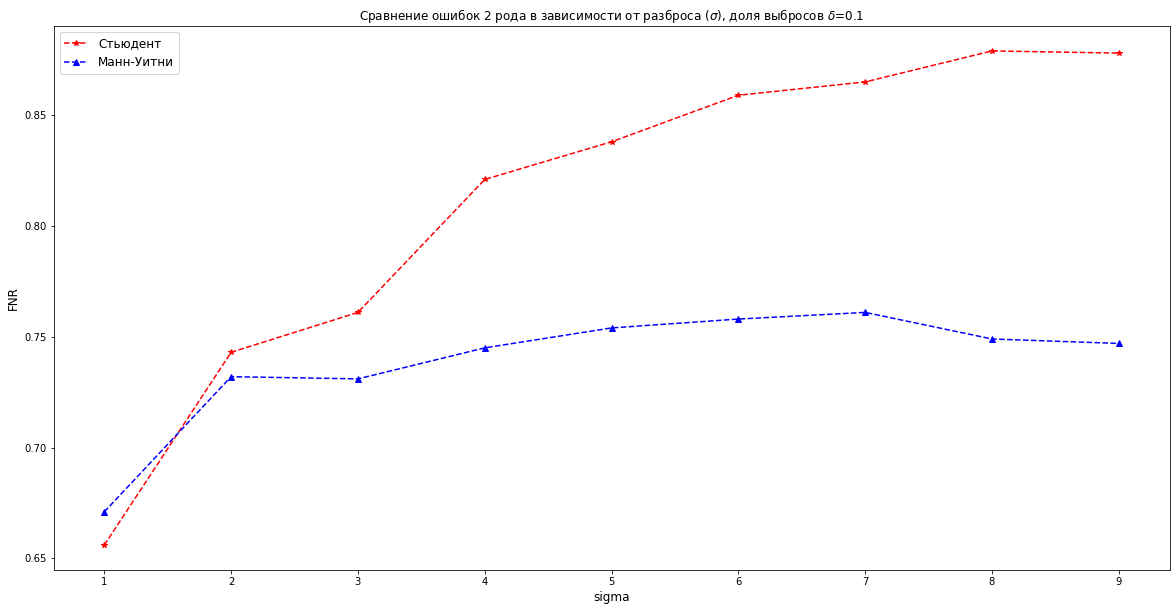

In [4]:
plt.figure(figsize=(20, 10))
plt.plot(sigma_list, fnr_ttest, '--*', label='Стьюдент', color = 'red')
plt.plot(sigma_list, fnr_mw, '--^', label='Манн-Уитни', color = 'blue')
plt.legend(fontsize=12)
plt.title(f'Сравнение ошибок 2 рода в зависимости от разброса ($\sigma$), доля выбросов $\delta$={delta}', fontsize=12)
plt.xlabel('sigma', fontsize=12)
plt.ylabel('FNR', fontsize=12)
plt.show()

## Влияния выбросов на критерии

In [5]:

np.random.seed(24)
negatives_ttest, negatives_mw = 0, 0
alpha, conf_int_alpha = 0.05, 0.05
mu_x, mu_y, sigma = 1, 1.5, 3
delta_list = np.linspace(0, 0.1, num=15)
n, n_tests = 20, 1000 
p_values_ttest, p_values_mw, fnr_ttest, fnr_mw = [], [], [], []


# Проверяем гипотезу о равенстве средних при неверной H0 (критерий Стьюдента)
for delta in tqdm_notebook(delta_list):
    for i in tqdm_notebook(range(n_tests)):  
        # генерация выборок
        X, Y = GenerateXY([mu_x, sigma], [mu_y, sigma], delta=delta, n = n)
        
        # рассчитываем pvalue для обоих критериев
        p_values_ttest.append(stats.ttest_ind(X, Y)[1])
        p_values_mw.append(stats.mannwhitneyu(X, Y)[1])
        # накапливаем negatives (подсчитываем количество ошибок)
        negatives_ttest += p_values_ttest[-1] > alpha  
        negatives_mw += p_values_mw[-1] > alpha  
    positives_ttest = n_tests - negatives_ttest
    positives_mw = n_tests - negatives_mw
    
    fnr_ttest.append(negatives_ttest / (positives_ttest + negatives_ttest))
    fnr_mw.append(negatives_mw / (positives_mw + negatives_mw))
    negatives_ttest = 0
    negatives_mw = 0

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

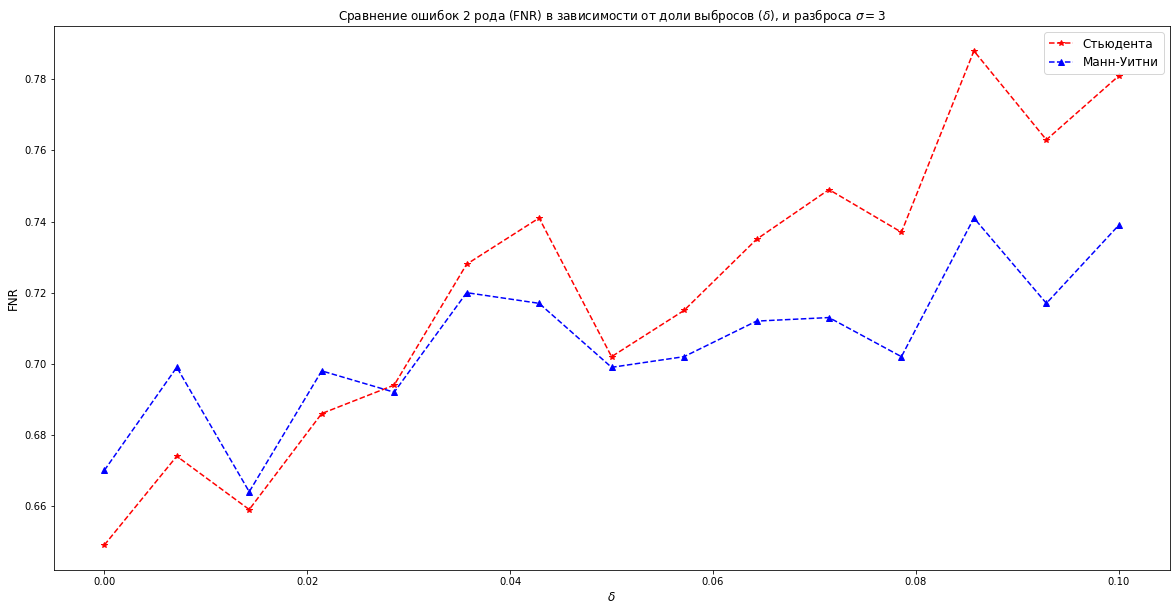

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(delta_list, fnr_ttest, '--*', label='Стьюдента', color = 'red')
plt.plot(delta_list, fnr_mw, '--^', label='Манн-Уитни', color = 'blue')
plt.legend(fontsize=12)
plt.title(f'Сравнение ошибок 2 рода (FNR) в зависимости от доли выбросов ($\delta$), и разброса $\sigma={sigma}$', fontsize=12)
plt.xlabel(f'$\delta$', fontsize=12)
plt.ylabel('FNR', fontsize=12)
plt.show()